In [2]:
import matplotlib.pyplot as plt
import fiona
import geopandas as gpd
import os
from shapely.ops import unary_union

path = "data_shapes/ctprvn.shp"
print(path)
c = fiona.open(path, encoding='cp949')
print(c.crs)
gdf = gpd.GeoDataFrame.from_features(c, crs=c.crs).to_crs('epsg:5174') #epsg5174

data_shapes/ctprvn.shp
PROJCS["PCS_ITRF2000_TM",GEOGCS["ITRF2000",DATUM["International_Terrestrial_Reference_Frame_2000",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6656"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    17 non-null     geometry
 1   CTPRVN_CD   17 non-null     object  
 2   CTP_ENG_NM  17 non-null     object  
 3   CTP_KOR_NM  17 non-null     object  
dtypes: geometry(1), object(3)
memory usage: 676.0+ bytes


In [4]:
gdf

,geometry,CTPRVN_CD,CTP_ENG_NM,CTP_KOR_NM
0,"POLYGON ((211135.603 440723.981, 211135.497 44...",11,Seoul,서울특별시
1,"MULTIPOLYGON (((393748.698 185883.929, 393745....",26,Busan,부산광역시
2,"POLYGON ((333003.156 260257.335, 333003.108 26...",27,Daegu,대구광역시
3,"MULTIPOLYGON (((92257.367 380783.8, 92263.117 ...",28,Incheon,인천광역시
4,"POLYGON ((178112.669 195515.871, 178181.762 19...",29,Gwangju,광주광역시
5,"POLYGON ((235673.778 332084.746, 235785.435 33...",30,Daejeon,대전광역시
6,"MULTIPOLYGON (((413390.578 210823.043, 413390....",31,Ulsan,울산광역시
7,"POLYGON ((215892.972 343985.09, 215891.081 343...",36,Sejong-si,세종특별자치시
8,"MULTIPOLYGON (((175988.716 393890.059, 176035....",41,Gyeonggi-do,경기도
9,"POLYGON ((286993.715 417665.653, 287035.684 41...",43,Chungcheongbuk-do,충청북도


In [15]:
population_data = {
    "전국": 51159889,
    "서울특별시": 9323492,
    "부산광역시": 3251625,
    "대구광역시": 2357040,
    "인천광역시": 3041215,
    "광주광역시": 1398538,
    "대전광역시": 1460|682,
    "울산광역시": 1093317,
    "세종특별자치시": 392154,
    "경기도": 13715016,
    "강원특별자치도": 1510181,
    "충청북도": 1591815,
    "충청남도": 2136299,
    "전라북도": 1729337,
    "전라남도": 1782183,
    "경상북도": 2516753,
    "경상남도": 3214016,
    "제주특별자치도": 666226
}

In [16]:
for index, row in gdf.iterrows():
    print(population_data[row['CTP_KOR_NM']])

9323492
3251625
2357040
3041215
1398538
1982
1093317
392154
13715016
1591815
2136299
1729337
1782183
2516753
3214016
666226
1510181


<Axes: >

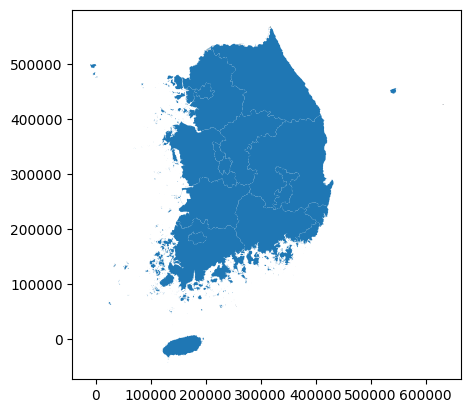

In [17]:
gdf.plot()